In [1]:
import pandas as pd


In [33]:
data = pd.read_csv('spam.csv',encoding='latin-1')

In [34]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [35]:
data = data[['v1','v2']]

In [36]:
data = data.rename({"v1":"label","v2":"features"},axis=1)

In [37]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize

In [38]:
stop_words = set(stopwords.words('english'))
lem = WordNetLemmatizer()
# features = data['features'].apply(lambda x:  " ".join(lem.lemmatize(word.lower()) for word in word_tokenize(x) if word not in stop_words ))

In [53]:
train= []
for i in range(len(data)):
    
    text = data['features'][i]
    text = re.sub("[^a-zA-Z]"," ",text)
    text = text.lower()
    text = " ".join(lem.lemmatize(word.lower()) for word in word_tokenize(text) if word not in stop_words )
    train.append(text)

In [58]:
lab= []
for i in range(len(data)):
    
    text = data['label'][i]
    lab.append(text)

In [67]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
label=encoder.fit_transform(lab)

In [68]:
label

array([0, 0, 1, ..., 0, 0, 0])

In [69]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(train)
features = tfidf_vectorizer.transform(train)

In [72]:
len(features.data)

44934

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(features,label,test_size=0.15)

In [81]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [79]:
x_train.shape,len(y_train)

((4736, 7017), 4736)

In [80]:
x_test.shape

(836, 7017)

In [83]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(model.predict(x_test),y_test)
print(f"The model has an accuracy of {accuracy}")

The model has an accuracy of 0.9712918660287081


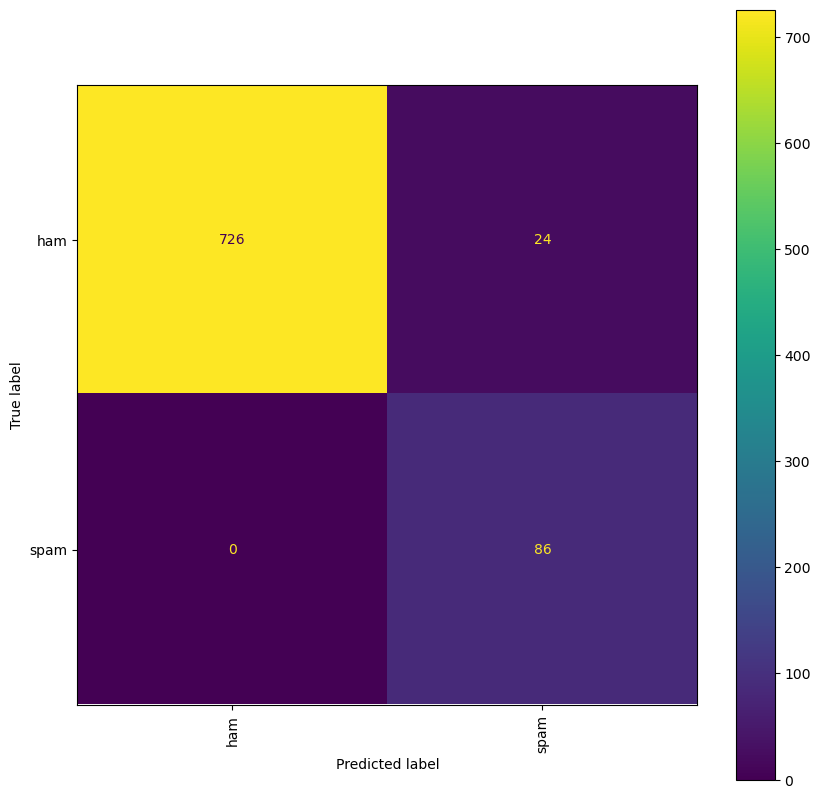

In [116]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,10))
disp = ConfusionMatrixDisplay.from_predictions(model.predict(x_test),y_test,ax=ax,display_labels=(classes),xticks_rotation='vertical')

In [87]:
dat= pd.read_csv('spam.csv',encoding='latin-1')

In [88]:
dat 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [89]:
dat = dat[['v1','v2']]

In [92]:
dat = dat.rename({'v1':'label','v2':'feature'},axis=1)

In [94]:
dat['classes']=data['label'].factorize()[0]

In [95]:
dat

,label,feature,classes
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [112]:
cat_idf = dat[['label','classes']].drop_duplicates()

In [113]:
cat_idf

,label,classes
0,ham,0
2,spam,1


In [114]:
classes =dict(cat_idf.values)

In [115]:
classes

{'ham': 0, 'spam': 1}